# 1. Understanding The Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('Customer churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 2. Cleaning the Data

### Replacing the blanks with 0 as tenure is 0 and no total charges were recorded.

In [11]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Check for missing values in each column

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking for Duplicate values in the data.

In [8]:
print(df["customerID"].duplicated().sum())

0


### Converting the value of Senior citizen from 1 and 0 to Yes/No for better readability and implementation on graphs.

In [10]:
# Creating a function that converts the values 0 and 1 to Yes/No
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

In [11]:
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Exploratory Data Analysis(EDA)

In [14]:
# Mode of Each column
print(df.mode().iloc[0])

customerID                0002-ORFBO
gender                          Male
SeniorCitizen                     No
Partner                           No
Dependents                        No
tenure                           1.0
PhoneService                     Yes
MultipleLines                     No
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 20.05
TotalCharges                        
Churn                             No
Name: 0, dtype: object


## Create Visualizations for Numerical Columns

### i. Countplot and Pie Chart (Count of Customers and their percentage by Churn)

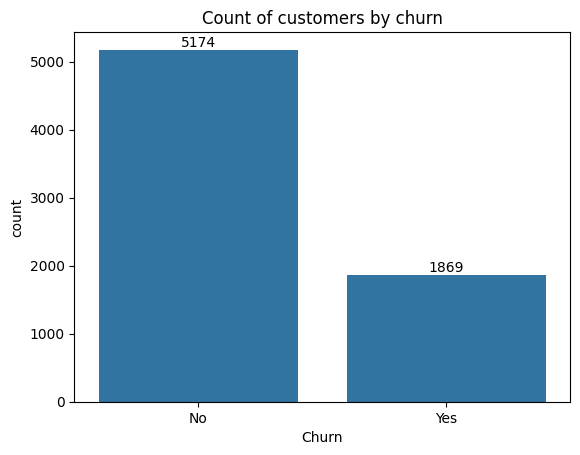

In [4]:
ax = sns.countplot(x="Churn", data=df)

ax.bar_label(ax.containers[0])
plt.title('Count of customers by churn')
plt.show()

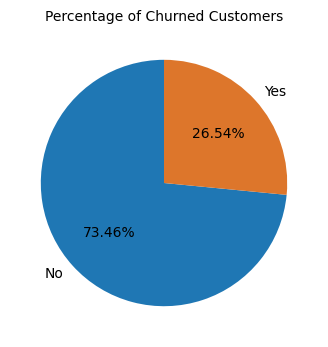

Churn
No     5174
Yes    1869


In [5]:
plt.figure(figsize=(4,4))
gb= df['Churn'].value_counts()
plt.pie(gb, labels=gb.index , autopct= "%1.2f%%", startangle=90, colors=['#1f77b4','#dd762b'])
plt.title('Percentage of Churned Customers', fontsize=10)
plt.show()
print(gb.to_string())

#From the above pie chart we can conclude that 26.54% of the customers have churned out.

### ii. Countplot (Churn of Customer by Gender)

<function matplotlib.pyplot.show(close=None, block=None)>

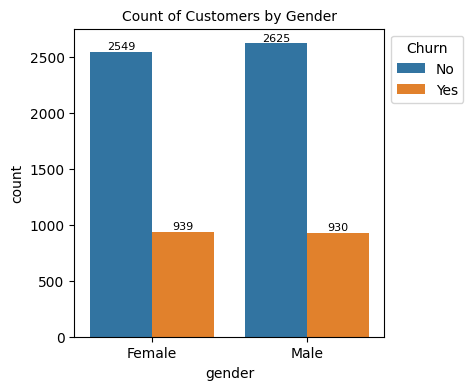

In [64]:
plt.figure(figsize=(4,4))
count_gen= sns.countplot(x="gender",data=df, hue="Churn")
# for loop for mentioning data labels on all the columns.
for container in count_gen.containers:
    count_gen.bar_label(container, fontsize=8)
plt.title('Count of Customers by Gender', fontsize=10)
plt.legend(title="Churn", bbox_to_anchor=(1,1))
plt.show

#Gender appears to have no significant effect on churn, as the numbers for both genders are quite similar.

### iii. Countplot and Stacked Bar chart (Count of SeniorCitizen customers with Percentage of Churn) 

<function matplotlib.pyplot.show(close=None, block=None)>

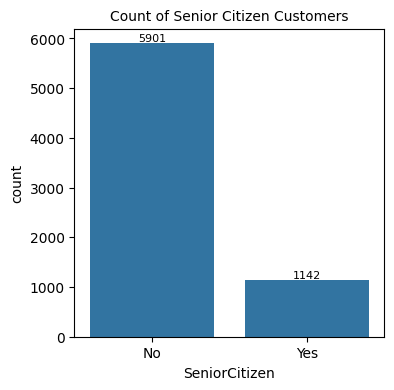

In [59]:
plt.figure(figsize=(4,4))
count_src=sns.countplot(x="SeniorCitizen",data=df)
count_src.bar_label(count_src.containers[0], fontsize=8)
plt.title('Count of Senior Citizen Customers', fontsize=10)
plt.show

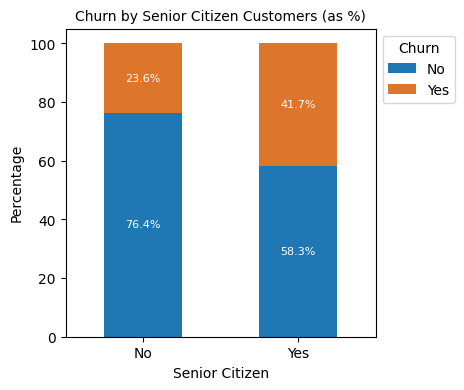

In [18]:
# Calculate the percentage values
df_grouped = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

# Plot the stacked bar chart
count_src1 = df_grouped.plot(kind="bar", stacked=True, figsize=(4, 4), color=['#1f77b4','#dd762b'])

# Add percentage labels
for container in count_src1.containers:
    count_src1.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=8, color='white')

plt.title("Churn by Senior Citizen Customers (as %)", fontsize=10)
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.xticks(rotation=0)
plt.legend(title="Churn", bbox_to_anchor=(1,1))
plt.show()


#Comparatively a greater percentage of customers from senior citizen category have churned out.

### iv. A Histogram (Distribution of Churn of Customer by Tenure)

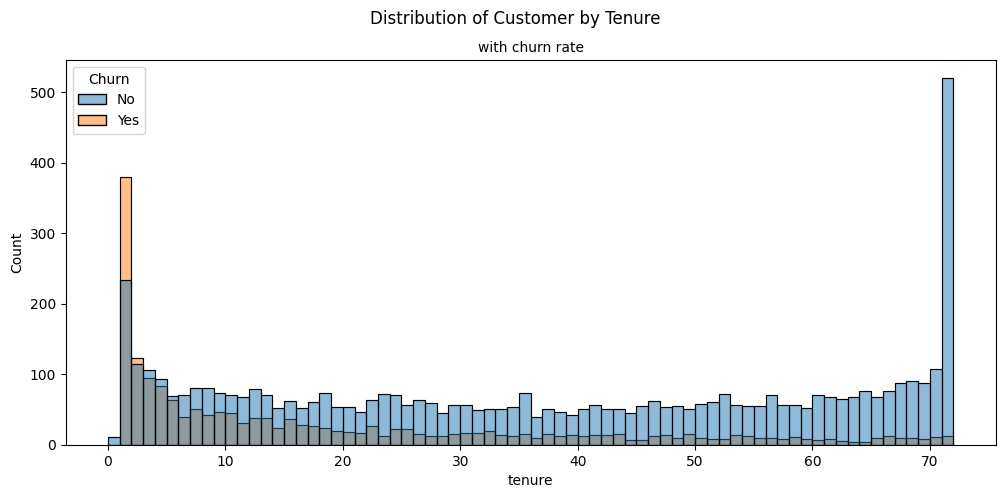

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(x='tenure', data= df, edgecolor='black', bins=72, hue='Churn')
plt.suptitle("Distribution of Customer by Tenure", fontsize=12)
plt.title("with churn rate", fontsize=10)
plt.show()

#People who have used our services for a long period of timee have stayed and people who have used for our services for less time(2 to 3 months) have churned. 

### v. Counplot and Stacked Bar Chart (Churn of Customer by Contract Period)

<function matplotlib.pyplot.show(close=None, block=None)>

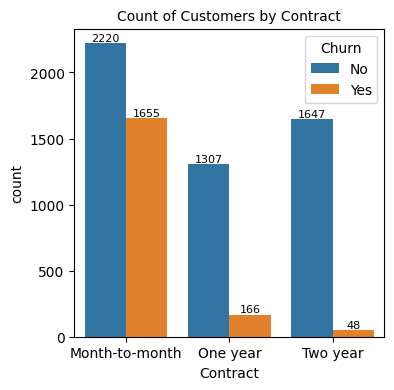

In [76]:
plt.figure(figsize=(4,4))
count_cont= sns.countplot(x="Contract",data=df, hue="Churn")
# for loop for mentioning data labels on all the columns.
for container in count_cont.containers:
    count_cont.bar_label(container, fontsize=8)
plt.title('Count of Customers by Contract', fontsize=10)
plt.legend(title="Churn", bbox_to_anchor=(1,1))
plt.show

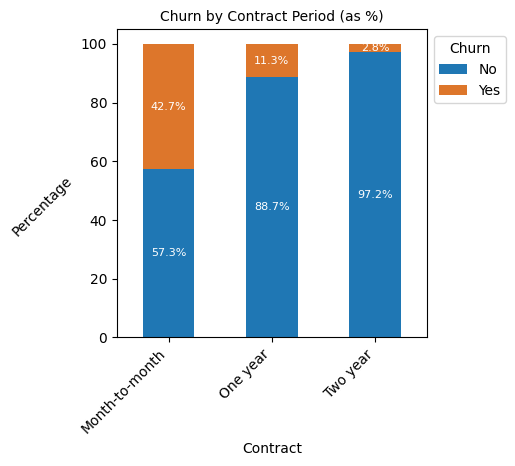

In [105]:
df_grouped = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack() * 100
count_cont1 = df_grouped.plot(kind="bar", stacked=True, figsize=(4, 4), color=['#1f77b4','#dd762b'])
for container in count_cont1.containers:
    count_cont1.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=8, color='white')

plt.title("Churn by Contract Period (as %)", fontsize=10)
plt.ylabel("Percentage",rotation=45, ha='right')
plt.xlabel("Contract")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Churn", bbox_to_anchor=(1,1))
plt.show()

#Customers who have a Month-to-Month contract are likely to churn than from the customers with One or Two year contract.

### vi. Countplot (Churn of Customer by Paymentmethod) 

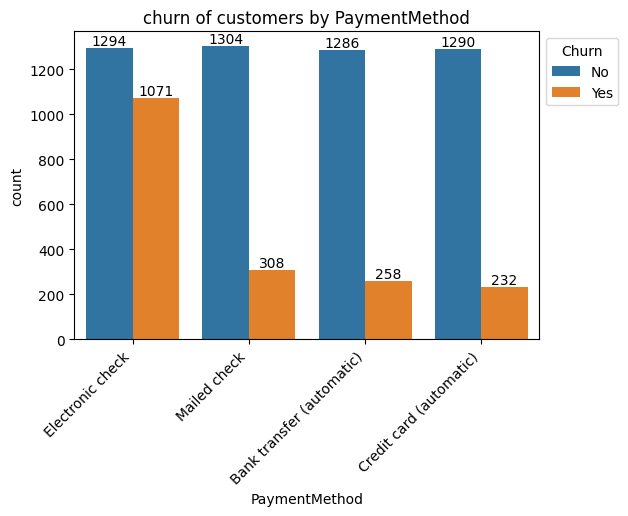

In [22]:
plt.figure(figsize=(6,4))
pay_m = sns.countplot(x="PaymentMethod", data=df, hue='Churn')
pay_m.bar_label(pay_m.containers[0])
pay_m.bar_label(pay_m.containers[1])
plt.xticks(rotation=45, ha='right')
plt.title('churn of customers by PaymentMethod')
plt.legend(title="Churn", bbox_to_anchor=(1,1))
plt.show()

#Customer is more likely to churn when the payment method is electronic check while curn rate is less in other payemnt methods.

### vii. SubPlot (Churn of Customer by various other factors)

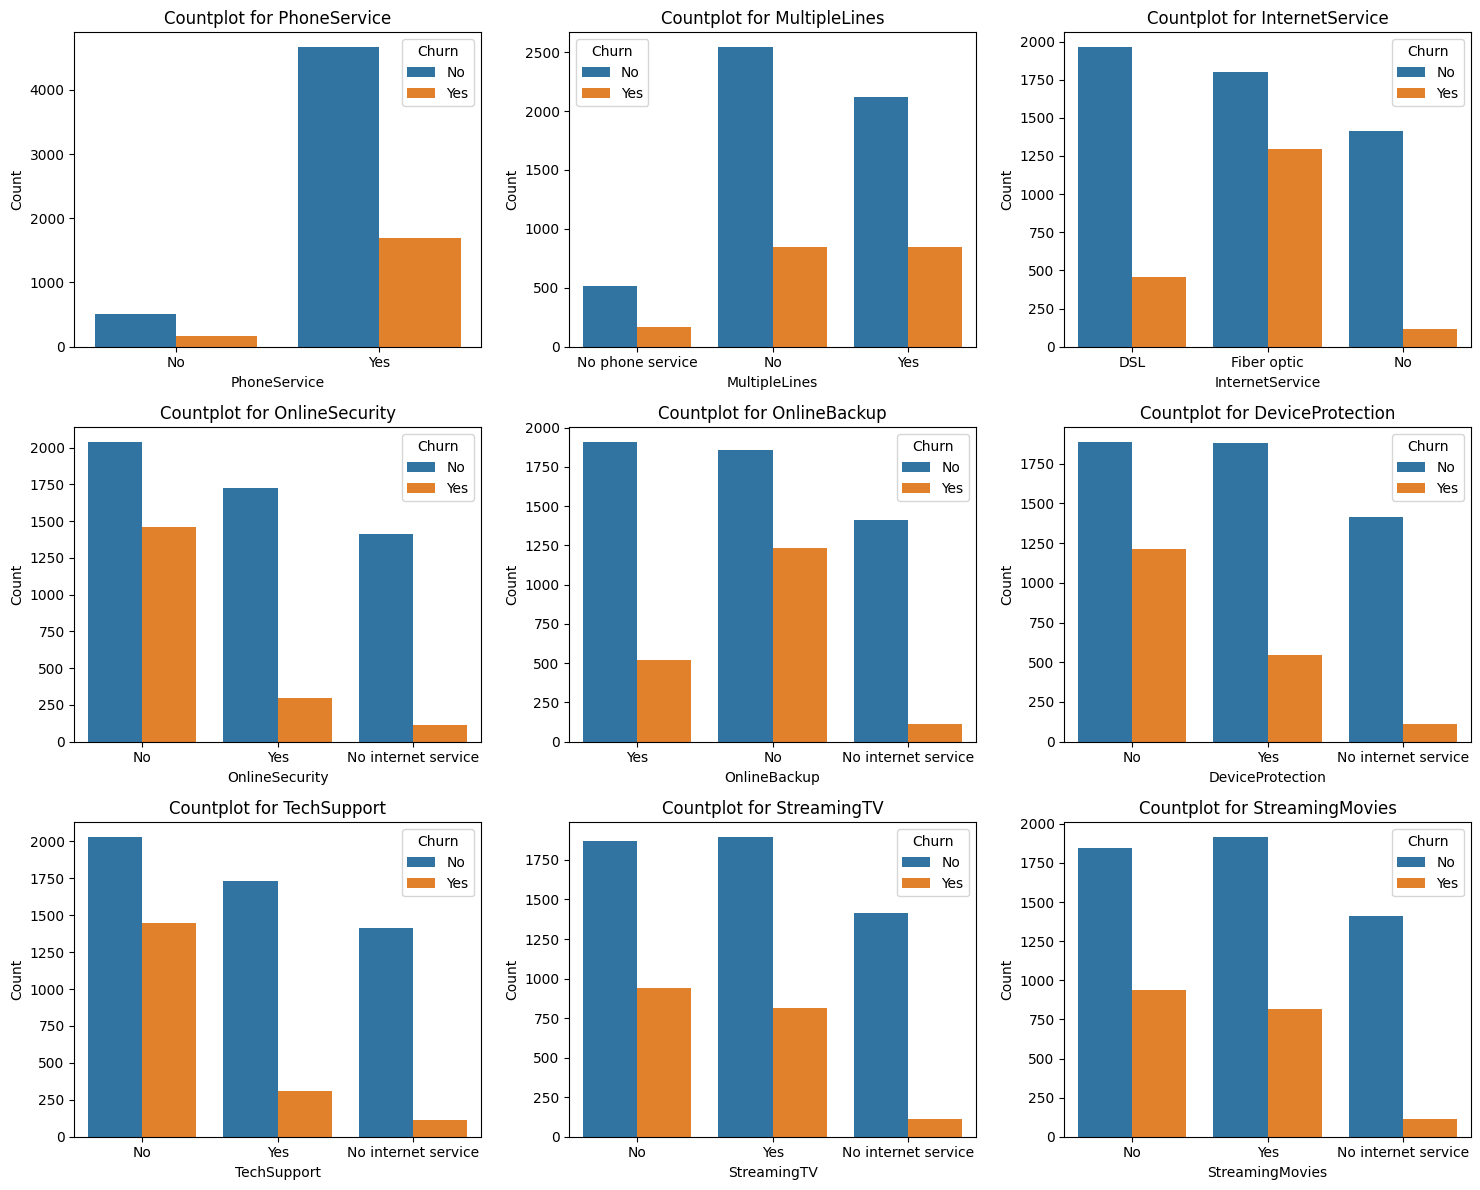

In [65]:
# List of columns to create subplots for
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Generate a countplot for each column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f'Countplot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# # Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#Customers are most likely to churn when they use Fiber optic InternetService, lack OnlineSecurity and TechSupport, or do not subscribe to StreamingTV. These services appear to be critical drivers of churn behavior, indicating areas where focused retention strategies can have the most impact.

# 4. Customer Segmentation Visualization

In [35]:
bins= [0,12,36,df['tenure'].max()]
labels=['0-12 months','13-36 months','37+ months']
df['tenure group']=pd.cut(df['tenure'],bins=bins, labels=labels)

Tenure_count=df['tenure group'].value_counts()
print(Tenure_count.to_string())

tenure group
37+ months      3001
0-12 months     2175
13-36 months    1856


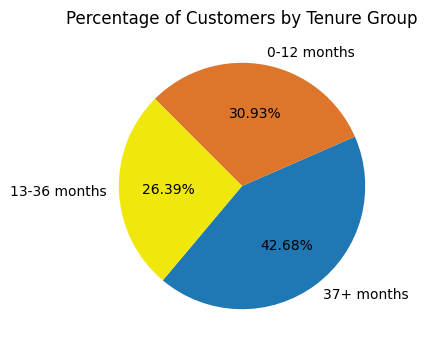

In [63]:
plt.figure(figsize=(4,4))
plt.pie(Tenure_count, labels=Tenure_count.index , autopct= "%1.2f%%", startangle=230, colors=['#1f77b4','#dd762b','#f0e80c'])
plt.title('Percentage of Customers by Tenure Group')
plt.show()

In [50]:
Tenure_average_charges=df.groupby('tenure group')['MonthlyCharges'].mean().reset_index()

print(Tenure_count.to_string())
print(Tenure_average_charges)

tenure group
37+ months      3001
0-12 months     2175
13-36 months    1856
   tenure group  MonthlyCharges
0   0-12 months       56.172023
1  13-36 months       63.248195
2    37+ months       72.008730


C:\Users\Vinay\AppData\Local\Temp\ipykernel_14884\3423064416.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Tenure_average_charges=df.groupby('tenure group')['MonthlyCharges'].mean().reset_index()


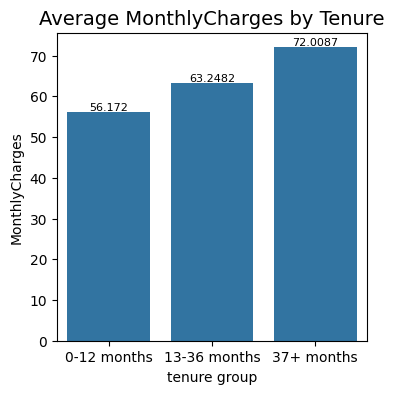

In [62]:
plt.figure(figsize=(4,4))
tg=sns.barplot(x='tenure group',y='MonthlyCharges', data=Tenure_average_charges)
tg.bar_label(tg.containers[0], fontsize=8)
plt.title('Average MonthlyCharges by Tenure', fontsize=14)
plt.show()